The NVIDIA System Management Interface (nvidia-smi) is a command line utility, based on top of the NVIDIA Management Library (NVML), intended to aid in the management and monitoring of NVIDIA GPU devices.

### no name found???

In [1]:
!nvidia-smi

Thu Oct 20 12:02:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    41W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### IMPORT LIBRARIES

In [1]:
import os
import zipfile
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

### MOUNT TO DRIVE

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

### MAKE COPIES FROM DATA CLASSES

In [4]:
rootPath=r"/Users/maithaalarjani/Desktop/ct"

### UNZIP DATA FILES

In [32]:
import zipfile
# shutil.rmtree('/content/OASIS_Data')
with zipfile.ZipFile("OASIS3_AD.zip", "r") as z_fp:
    z_fp.extractall("./OASIS_Data/AD")

with zipfile.ZipFile("OASIS3_CN.zip", "r") as z_fp:
    z_fp.extractall("./OASIS_Data/CN")

### CALL NiBabel LIBRARY
Read / write access to some common neuroimaging file formats



In [6]:
! pip install nibabel

### TAKE THE UNZIP FILES


In [34]:
from glob import glob
abnormal_scan_paths = glob(rootPath + r'/OASIS_Data/AD/*/*/*/*T2*')
normal_scan_paths = glob(rootPath + r'/OASIS_Data/CN/*/*/*/*T2*')

In [35]:
normal_scan_paths

['/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN/OAS30048_MR_d3375/anat7/NIFTI/sub-OAS30048_ses-d3375_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN/OAS30048_MR_d3375/anat2/NIFTI/sub-OAS30048_ses-d3375_acq-TSE_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN/OAS30040_MR_d5108/anat1/NIFTI/sub-OAS30040_ses-d5108_acq-TSE_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN/OAS30040_MR_d5108/anat3/NIFTI/sub-OAS30040_ses-d5108_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN/OAS30033_MR_d1267/anat1/NIFTI/sub-OAS30033_ses-d1267_acq-TSE_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN/OAS30033_MR_d1267/anat4/NIFTI/sub-OAS30033_ses-d1267_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN/OAS30002_MR_d2340/anat7/NIFTI/sub-OAS30002_ses-d2340_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN/OAS30002_MR_d2340/anat2/NIFTI/sub-OAS30002_ses-d2340_acq-TSE_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/CN

In [36]:
abnormal_scan_paths


['/Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30153_MR_d2220/anat1/NIFTI/sub-OAS30153_ses-d2220_acq-TSE_run-01_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30153_MR_d2220/anat2/NIFTI/sub-OAS30153_ses-d2220_acq-TSE_run-02_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30262_MR_d0839/anat3/NIFTI/sub-OAS30262_ses-d0839_acq-TSE_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30287_MR_d0890/anat1/NIFTI/sub-OAS30287_ses-d0890_acq-TSE_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30287_MR_d0890/anat4/NIFTI/sub-OAS30287_ses-d0890_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30170_MR_d0005/anat1/NIFTI/sub-OAS30170_ses-d0005_acq-TSE_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30170_MR_d0005/anat5/NIFTI/sub-OAS30170_ses-d0005_T2w.nii.gz',
 '/Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30373_MR_d0048/anat1/NIFTI/sub-OAS30373_ses-d0048_acq-TSE_T2w.nii.gz',
 '/Users/maithaala


###Library for 3D augmentations

In [8]:
! pip install volumentations-3D

     |████████████████████████████████| 54.6 MB 258 kB/s ta 0:00:016    |███▌                            | 6.0 MB 6.5 MB/s eta 0:00:08


In [9]:
# !rm -r '/content/drive/MyDrive/3D Neural Images'

### mkdir() method creates a blank directory on your file system.

create 3- folders 

In [37]:
!mkdir '{rootPath}/3D Neural Images'

mkdir: /Users/maithaalarjani/Desktop/ct/3D Neural Images: File exists


In [38]:
!mkdir '{rootPath}/3D Neural Images'
!mkdir '{rootPath}/3D Neural Images/Abnormal Images'
!mkdir '{rootPath}/3D Neural Images/Normal Images'

mkdir: /Users/maithaalarjani/Desktop/ct/3D Neural Images: File exists


mkdir: /Users/maithaalarjani/Desktop/ct/3D Neural Images/Abnormal Images: File exists
mkdir: /Users/maithaalarjani/Desktop/ct/3D Neural Images/Normal Images: File exists


In [18]:
from volumentations import *
import nibabel as nib
import tqdm

###IMAGES AUGMENTATION

WHAT TYPE OF AUGMENTATION DONE????
#### ERROR?? 

In [40]:
def get_augmentation(patch_size):
    return Compose([
        RandomResizedCrop(patch_size, p = 0.5),
        Resize(patch_size, interpolation=1, resize_type=0, always_apply=True, p=1.0),
        
    ], p=1.0)

aug = get_augmentation((128, 128, 32))

def get_resize_3D_images(folder_path , folder_name):
  for i , x in tqdm.tqdm(enumerate(folder_path)):
    print (i,x)
    print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    img = nib.load(x)
    img = img.get_fdata()
    data = {'image': img}
    aug_data = aug(**data)
    img = aug_data['image']
    np.save(rootPath+ r'/3D Neural Images/' + folder_name + '/' + 'random_res_' + str(i) + '.npy' , img)

    #SAVE IMAGES AS NUMPY ARRAY FOR LESS TIME UPLOADING

### ERROR


In [41]:
get_resize_3D_images(abnormal_scan_paths , 'Abnormal Images')
get_resize_3D_images(normal_scan_paths , 'Normal Images')

0it [00:00, ?it/s]

0 /Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30153_MR_d2220/anat1/NIFTI/sub-OAS30153_ses-d2220_acq-TSE_run-01_T2w.nii.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++


1it [00:00,  3.52it/s]

1 /Users/maithaalarjani/Desktop/ct/OASIS_Data/AD/OAS30153_MR_d2220/anat2/NIFTI/sub-OAS30153_ses-d2220_acq-TSE_run-02_T2w.nii.gz
++++++++++++++++++++++++++++++++++++++++++++++++++++++


RuntimeError: sequence argument must have length equal to input rank

In [14]:
ROOT = '/content/drive/MyDrive/3D Neural Images/Normal Images'

WHAT DOES NUMBER MEAN????????

In [15]:
img_path = os.listdir('/content/drive/MyDrive/3D Neural Images/Normal Images')[455]

IndexError: ignored

### LOAD AN IMAGE

In [ ]:
np.load(ROOT + '/' + img_path).shape

(128, 128, 32)

### SHOW IMAGE SAMPLE

23 MEANING????

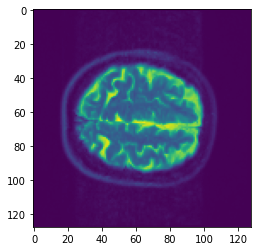

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.load(ROOT + '/' + img_path)[:,:,23])

MEANING????????????/

In [ ]:
!du -sh /'/content/drive/MyDrive/3D Neural Images'

0	//content/drive/MyDrive/3D Neural Images


### TO UNIFY IMAGES SHAPE TO GET READY TO THE CNN (FILTER)

In [ ]:
def make_dataset_into_batches(folder_path):
  files = []
  for x in os.listdir(folder_path):
    img = np.load(os.path.join(folder_path, x)) 
    if(img.shape == (128 , 128 , 32)):
      files.append(img)
  return files

In [ ]:
###AS LIST
abnormal_images = make_dataset_into_batches('/content/drive/MyDrive/3D Neural Images/Abnormal Images')
normal_images = make_dataset_into_batches('/content/drive/MyDrive/3D Neural Images/Normal Images')

In [ ]:
### CONVERT TO NP ARRAY
abnormal_images = np.array(abnormal_images)
normal_images = np.array(normal_images)

In [ ]:
### GIVE EACH CLASS A LABEL

abnormal_labels = [0 for x in range(len(abnormal_images))]
normal_labels = [1 for x in range(len(normal_images))]

### GET LENGTH
DATA IS BALANCED



In [ ]:
len(abnormal_labels) , len(normal_labels)

(945, 925)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
### DIVIDE DATA INTO TRAIN AND TEST 
#EACH R IS 85% OF A WHOLE CLASS AS TRAINING
## VALIDATION TESTING ?????????

In [ ]:
r1=int(0.85*abnormal_images.shape[0])
r2=int(0.85*normal_images.shape[0])
x_train = np.concatenate((abnormal_images[:r1], normal_images[:r2]), axis=0)
### IS THE CONCTENATE OF BOTH CLASS TRAINING PART
y_train = np.concatenate((abnormal_labels[:r1], normal_labels[:r2]), axis=0)
### THIER LABELS 
x_val = np.concatenate((abnormal_images[r1:], normal_images[r2:]), axis=0)
### IS THE CONCTENATE OF BOTH CLASS VALIDATION PART
y_val = np.concatenate((abnormal_labels[r1:], normal_labels[r2:]), axis=0)
### THIER LABELS 

print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)

Number of samples in train and validation are 1589 and 281.


CONVERT LABELS 0,1 INTO CATEGORICAL


In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

CONVERT FROM NP ARRAY INTO TENSORS????


In [ ]:
# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

batch_size = 32
### DIVIDE DATA INTO PACHES FOR EACH EPOCH
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
   ### Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.
   ### TO CHOOSE DATA RANDOMLY


    .batch(batch_size)
    .prefetch(32)
)
# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .batch(batch_size)
    .prefetch(32)
)

Dimension of the MRI scan is: (128, 128, 32)


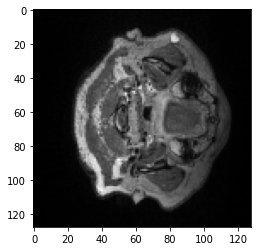

In [ ]:
import matplotlib.pyplot as plt

data = train_dataset.take(1)
images, labels = list(data)[0]
images = images.numpy()
image = images[1]
print("Dimension of the MRI scan is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 5]), cmap="gray")

### SET UP KERAS, CLASSIFICATION MODEL 3D , TO BUILD THE NETWORK (PRETRAINED NET)

In [ ]:
!pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 


In [ ]:
!pip install classification-models-3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 


In [ ]:
from classification_models_3D.tfkeras import Classifiers

base_model, preprocess_input = Classifiers.get('seresnet18')
# GET SERESNET 28 MODEL 
model = base_model(input_shape=(128, 128, 32, 1 ), weights=None , include_top = False , classes=2 )
# INPUT 128,128,32 AND 1 FOR LABELS
x = layers.GlobalAveragePooling3D()(model.output)
x = layers.Dropout(0.5)(x)
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting
outputs = layers.Dense(units=2, activation="sigmoid")(x)
# 2 OUTPUTS AND ACTIVATION FUNCTION
model = keras.Model(model.inputs , outputs)


In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 128, 128, 3  0           []                               
                                2, 1)]                                                            
                                                                                                  
 bn_data (BatchNormalization)   (None, 128, 128, 32  3           ['data[0][0]']                   
                                , 1)                                                              
                                                                                                  
 zero_padding3d_36 (ZeroPadding  (None, 134, 134, 38  0          ['bn_data[0][0]']                
 3D)                            , 1)                                                        

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adadelta(learning_rate=1.0),
    metrics=["acc"],
)
# LOSS FOR BINARY
# OTHER HYPERPARAMETER ARE ADHOC

SAVE BEST WIEGHTS IN .h5 TO NOT DUPLICATE

In [ ]:
with tf.device('/GPU:0'):
  checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.h5", save_best_only=True
  )  
  # Train the model, doing validation at the end of each epoch
  epochs = 50
  model.fit(
      train_dataset,
      validation_data=validation_dataset,
      epochs=epochs,
      shuffle=True,
      verbose=2,
      callbacks = checkpoint_cb
  )
  # SHUFFLE TO CHOOSE DATA RANDOMLY


Epoch 1/50


ValueError: ignored

KeyError: ignored

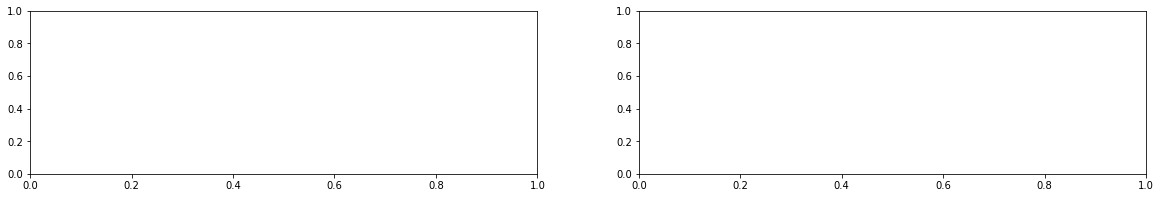

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
model2 = tf.keras.models.load_model("/content/3d_image_classification.h5")
loss, val_accuracy = model2.evaluate(validation_dataset)

9/9 [==============================] - 4s 248ms/step - loss: 0.2968 - acc: 0.9110


In [ ]:
#COPY CONTENT PATH INTO
!cp '/content/3d_image_classification.h5' '/content/drive/MyDrive/3D Neural Images'

### CONFUSION MATRICS

In [ ]:
from sklearn.metrics import confusion_matrix
test_labels = []
rounded_predictions2 = []
rounded_predictions3 = []
class_names2 = ['Normal', 'Abnormal']
for image, labels in validation_dataset:

  #FOR EACH IMAGE IN VAL SET PREDICT 
#  for j in labels:
    predictions= model2.predict(image)
    # print(predictions)
    rounded_predictions3.append(predictions)
    rounded_predictions = np.array(predictions>0.5)
    # print(rounded_predictions)
    rounded_predictions2.append(rounded_predictions)
    test_labels.append(labels)

rounded_predictions2 = np.concatenate(rounded_predictions2)
test_labels = np.concatenate(test_labels)
rounded_predictions3 = np.concatenate(rounded_predictions3)


### PROBABILITY FUNCTION FOR EACH IMAGE MORE THAN 0.5 BELONGS TO CLASS 1 OTHERWISE CLASS 2

In [ ]:
##LABELS FOR EACH INSTANCE IN TEST GROUP

test_labels.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2

cm = confusion_matrix(y_true=test_labels.argmax(axis=1), y_pred=rounded_predictions2.argmax(axis=1))
print(cm)
### TOTAL MUST BE AS TEST GROUP 281
# TRUE 

[[135   7]
 [ 18 121]]


In [ ]:
confusion_matrix = cm
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity
TPR = TP/(TP+FN)
# Specificity
TNR = TN/(TN+FP) 
# Precision
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# f1 score
FSC = 2*TPR*PPV/(TPR+PPV)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# J score
JSC = TPR+TNR-1
# false positive rate
FPR = FP/(FP+TN)   # FPR = 1-specificity
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
TPR, TNR, PPV, NPV, FPR, FNR, ACC, TN, TP, FP, FN
resultss = np.zeros([7,2])
import pandas as pd
TPR
resultss[0,:] =TPR
resultss[1,:] =TNR
resultss[2,:] =PPV
resultss[3,:] =FSC
resultss[4,:] =ACC
resultss[5,:] = JSC
resultss[6,:]  = FPR
resultss

array([[0.95070423, 0.8705036 ],
       [0.8705036 , 0.95070423],
       [0.88235294, 0.9453125 ],
       [0.91525424, 0.90636704],
       [0.91103203, 0.91103203],
       [0.82120782, 0.82120782],
       [0.1294964 , 0.04929577]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


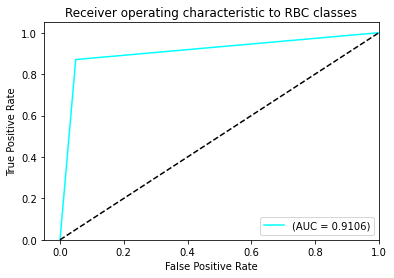

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Plot linewidth.
lw = 1.5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 1
y_score = np.array(rounded_predictions3)
y_score = y_score.argmax(axis=1)
y_test = label_binarize(test_labels, classes=[0, 1])
y_test = y_test.argmax(axis=1)
# for i in range(num_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='(AUC = {0:0.4f})'
             ''.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to RBC classes')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_true=test_labels.argmax(axis=1)
y_pred=rounded_predictions2.argmax(axis=1)
print(classification_report(y_true, y_pred))


NameError: ignored